In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\User\\jupyter-noutbooks\\DATA\\rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [8]:
df.columns = ['Signal','Density']

In [9]:
df.corr()

,Signal,Density
Signal,1.0000,-0.0306
Density,-0.0306,1.0000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [11]:
df.describe()

,Signal,Density
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


<AxesSubplot:xlabel='Signal', ylabel='Density'>

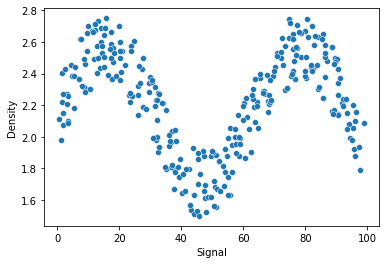

In [12]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [19]:
X = df['Signal'].values.reshape(-1,1)

In [20]:
y = df['Density']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

# Choose Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear_model = LinearRegression()

In [25]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [26]:
linear_predictions = linear_model.predict(X_test)

In [27]:
linear_predictions

array([2.21881855, 2.20065352, 2.21472324, 2.21799439, 2.20901592,
       2.21894912, 2.22381933, 2.21787738, 2.20368222, 2.2034435 ,
       2.22610239, 2.2004913 , 2.23485715, 2.24374317, 2.22322118,
       2.2158634 , 2.20285925, 2.22864354, 2.21659998, 2.23722892,
       2.20802066, 2.24431374, 2.20739768, 2.20614465, 2.19981917,
       2.23643331, 2.19917144, 2.25415309, 2.2100169 , 2.20405209])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mean_absolute_error(y_test,linear_predictions)

0.24102551432457792

In [32]:
np.sqrt(mean_squared_error(y_test,linear_predictions))

0.29635030529174805

In [33]:
my_signals = np.arange(0,100)

In [35]:
signal_preds = linear_model.predict(my_signals.reshape(-1,1))

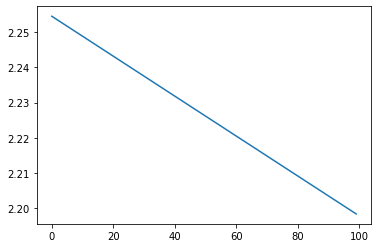

In [36]:
plt.plot(my_signals,signal_preds)

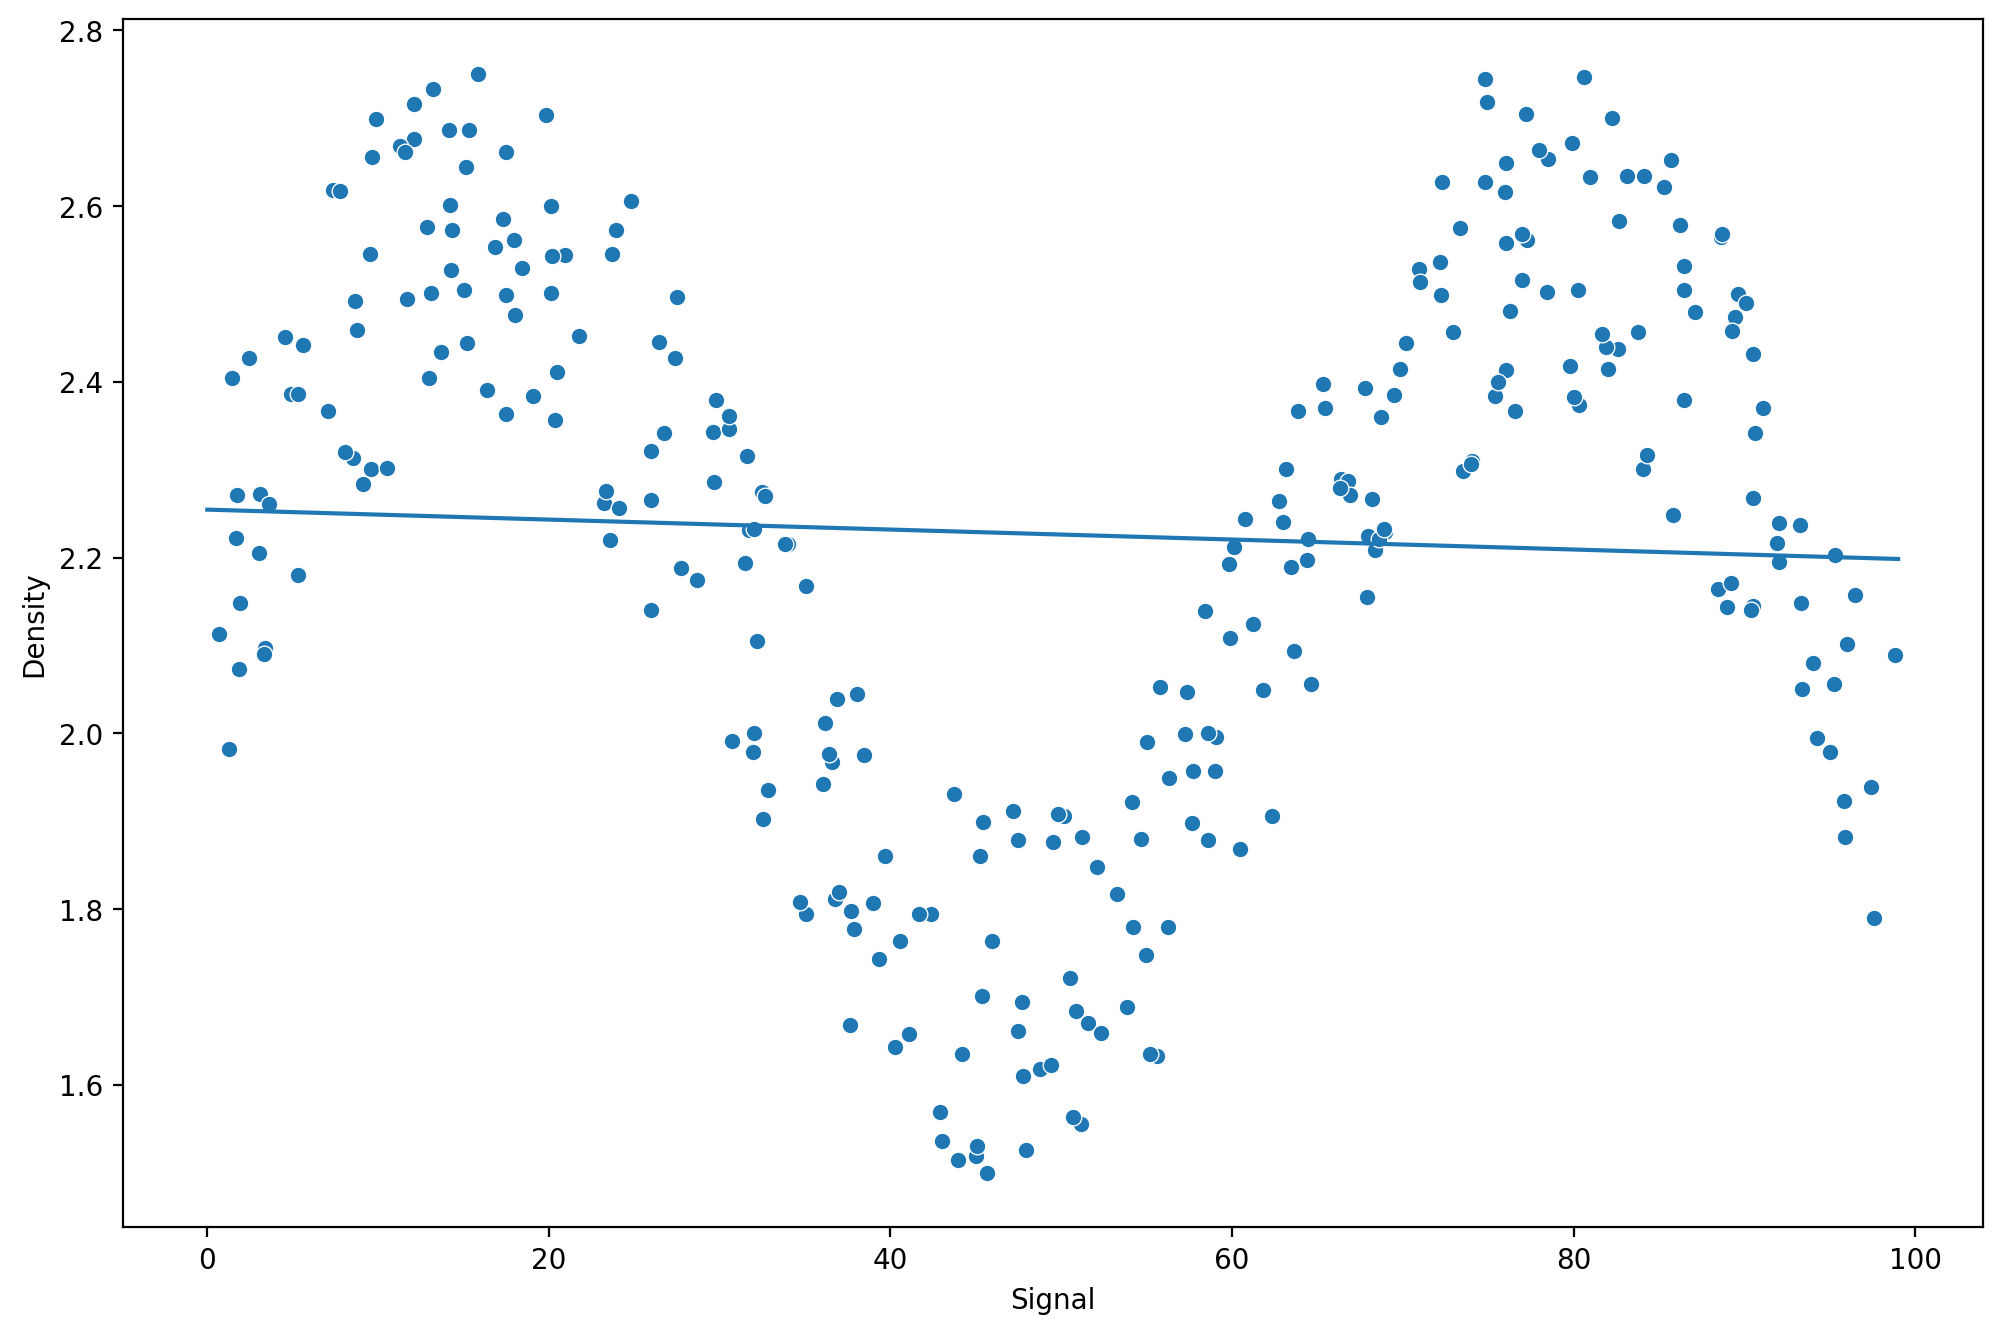

In [37]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
plt.plot(my_signals,signal_preds)

# Choose Polynomial Regression

In [38]:
def run_model(model,X_train,X_test,y_train,y_test):
    # Fit
    model.fit(X_train,y_train)
    # GEt metrics
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    mae = mean_absolute_error(y_test,predictions)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    # plot results
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='red')
    plt.plot(my_signals,signal_preds)
    

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE:0.1400561470380338
MAE:0.1257364934407526


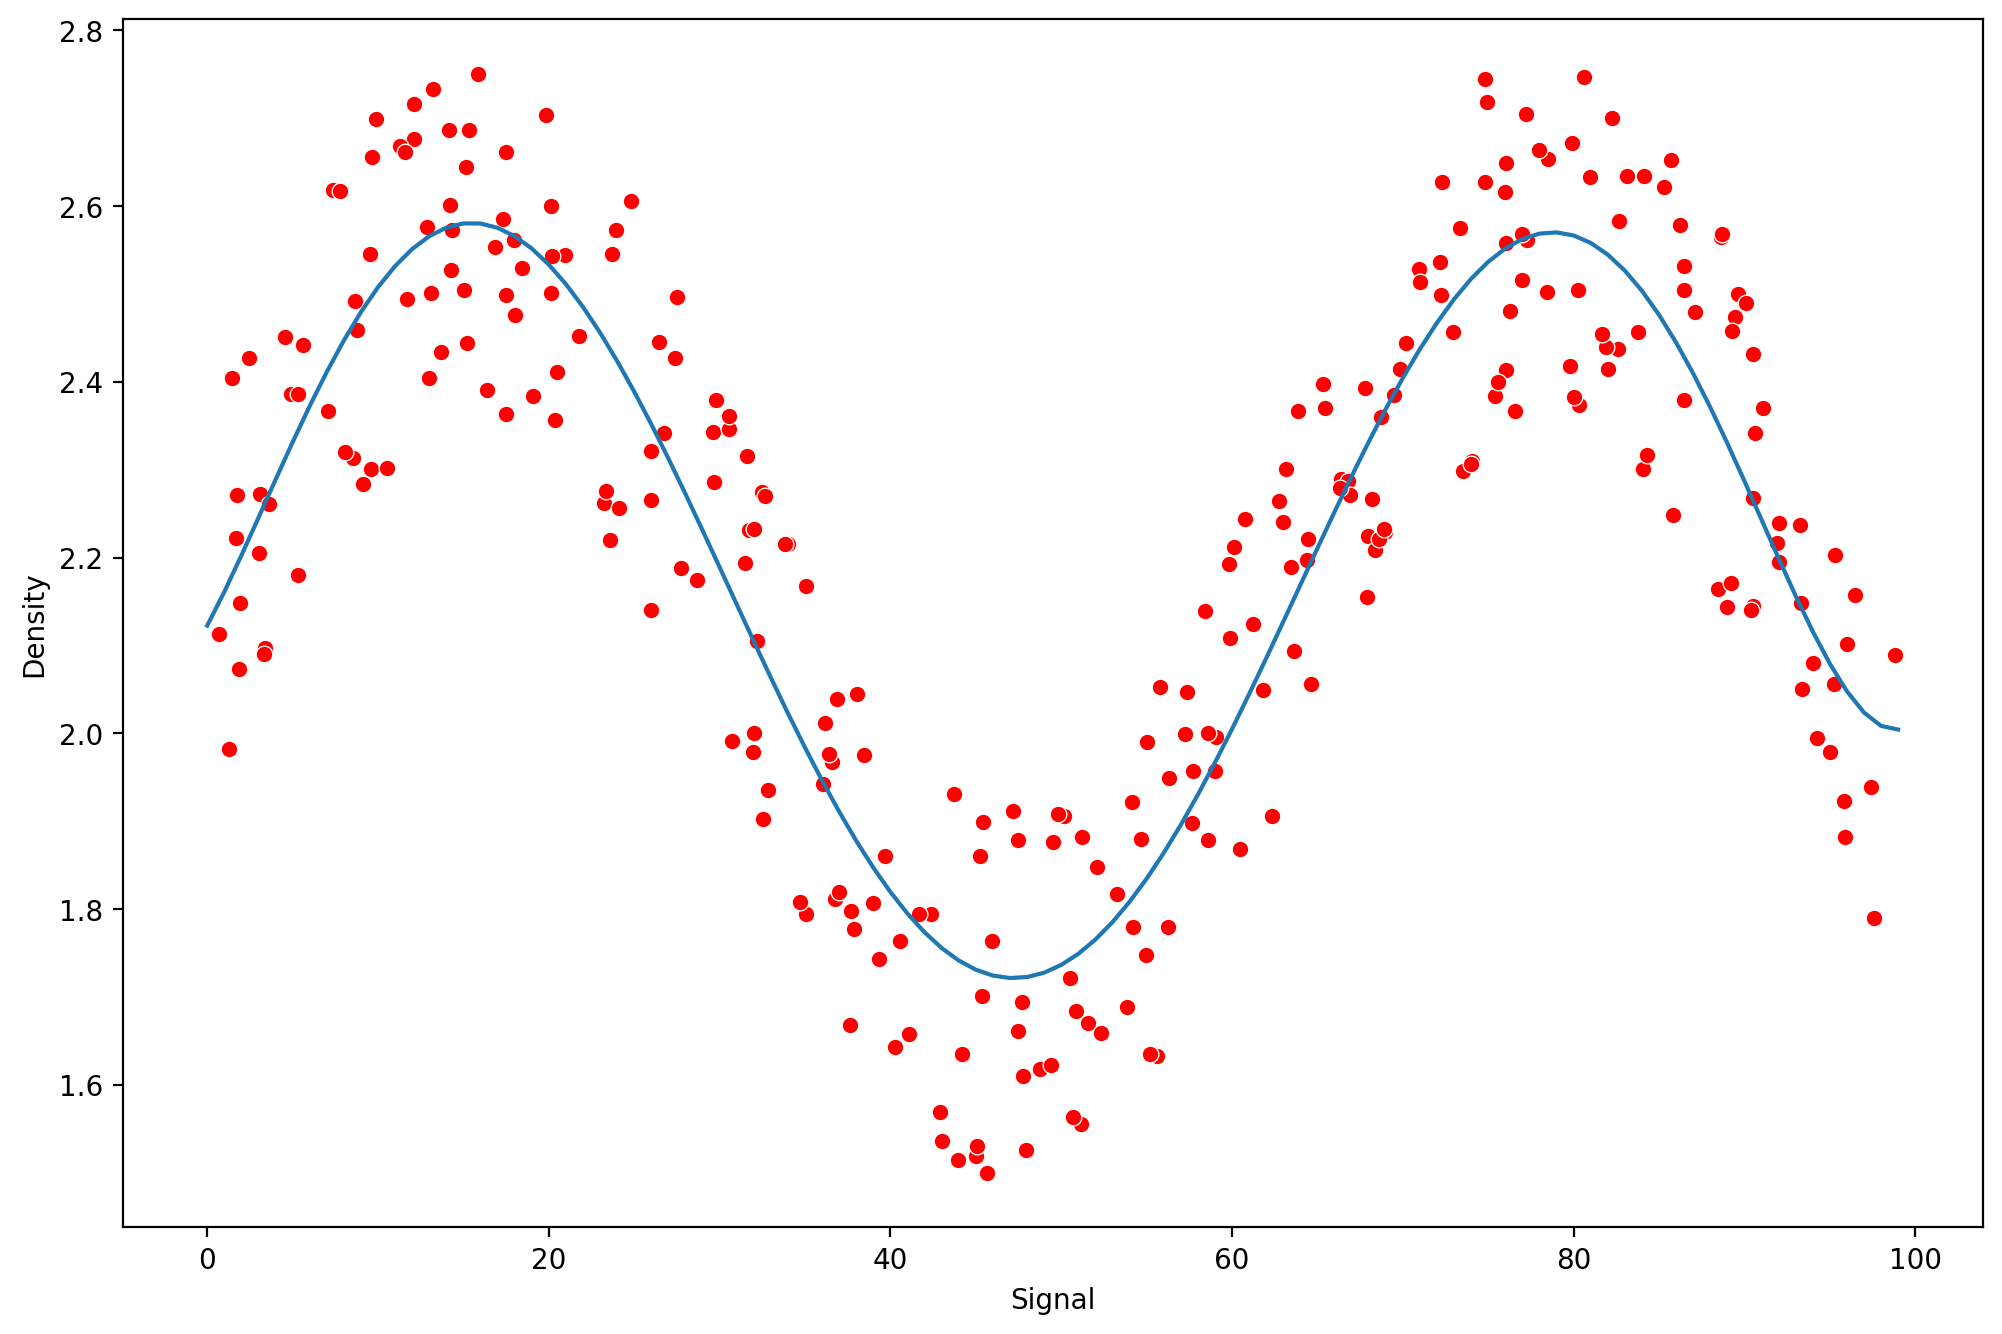

In [47]:
run_model(pipe,X_train,X_test,y_train,y_test)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
k_values = [1,5,10,15,20]

RMSE:0.16707571608725927
MAE:0.1206619084399996
RMSE:0.15404174541671728
MAE:0.13010617319422033
RMSE:0.1389085595310869
MAE:0.12000896423683943
RMSE:0.14882126422823572
MAE:0.12957712703451107
RMSE:0.15369417602302493
MAE:0.13272868549802058


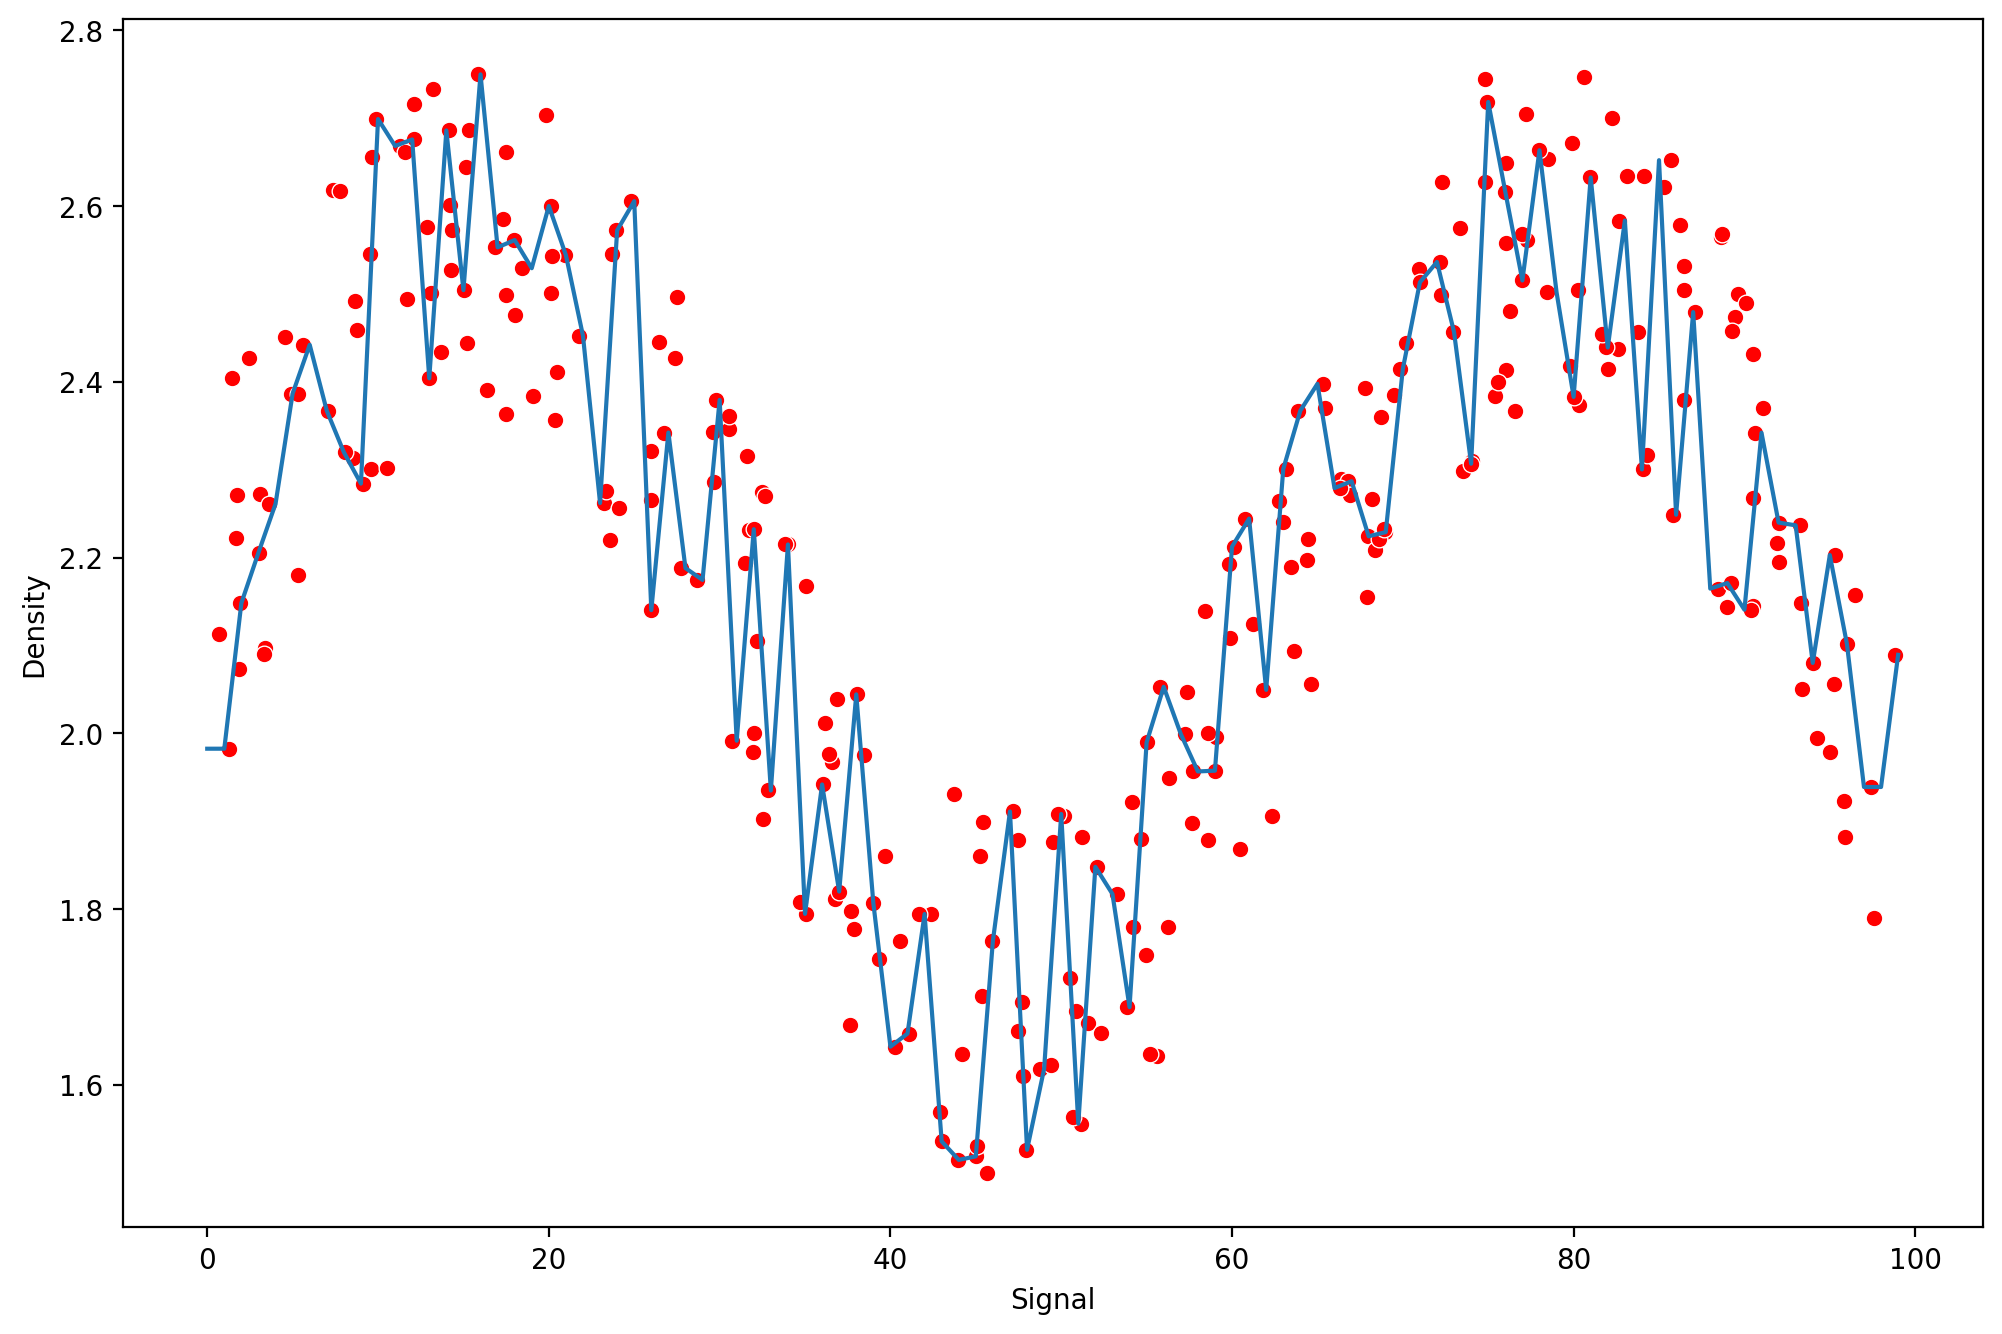

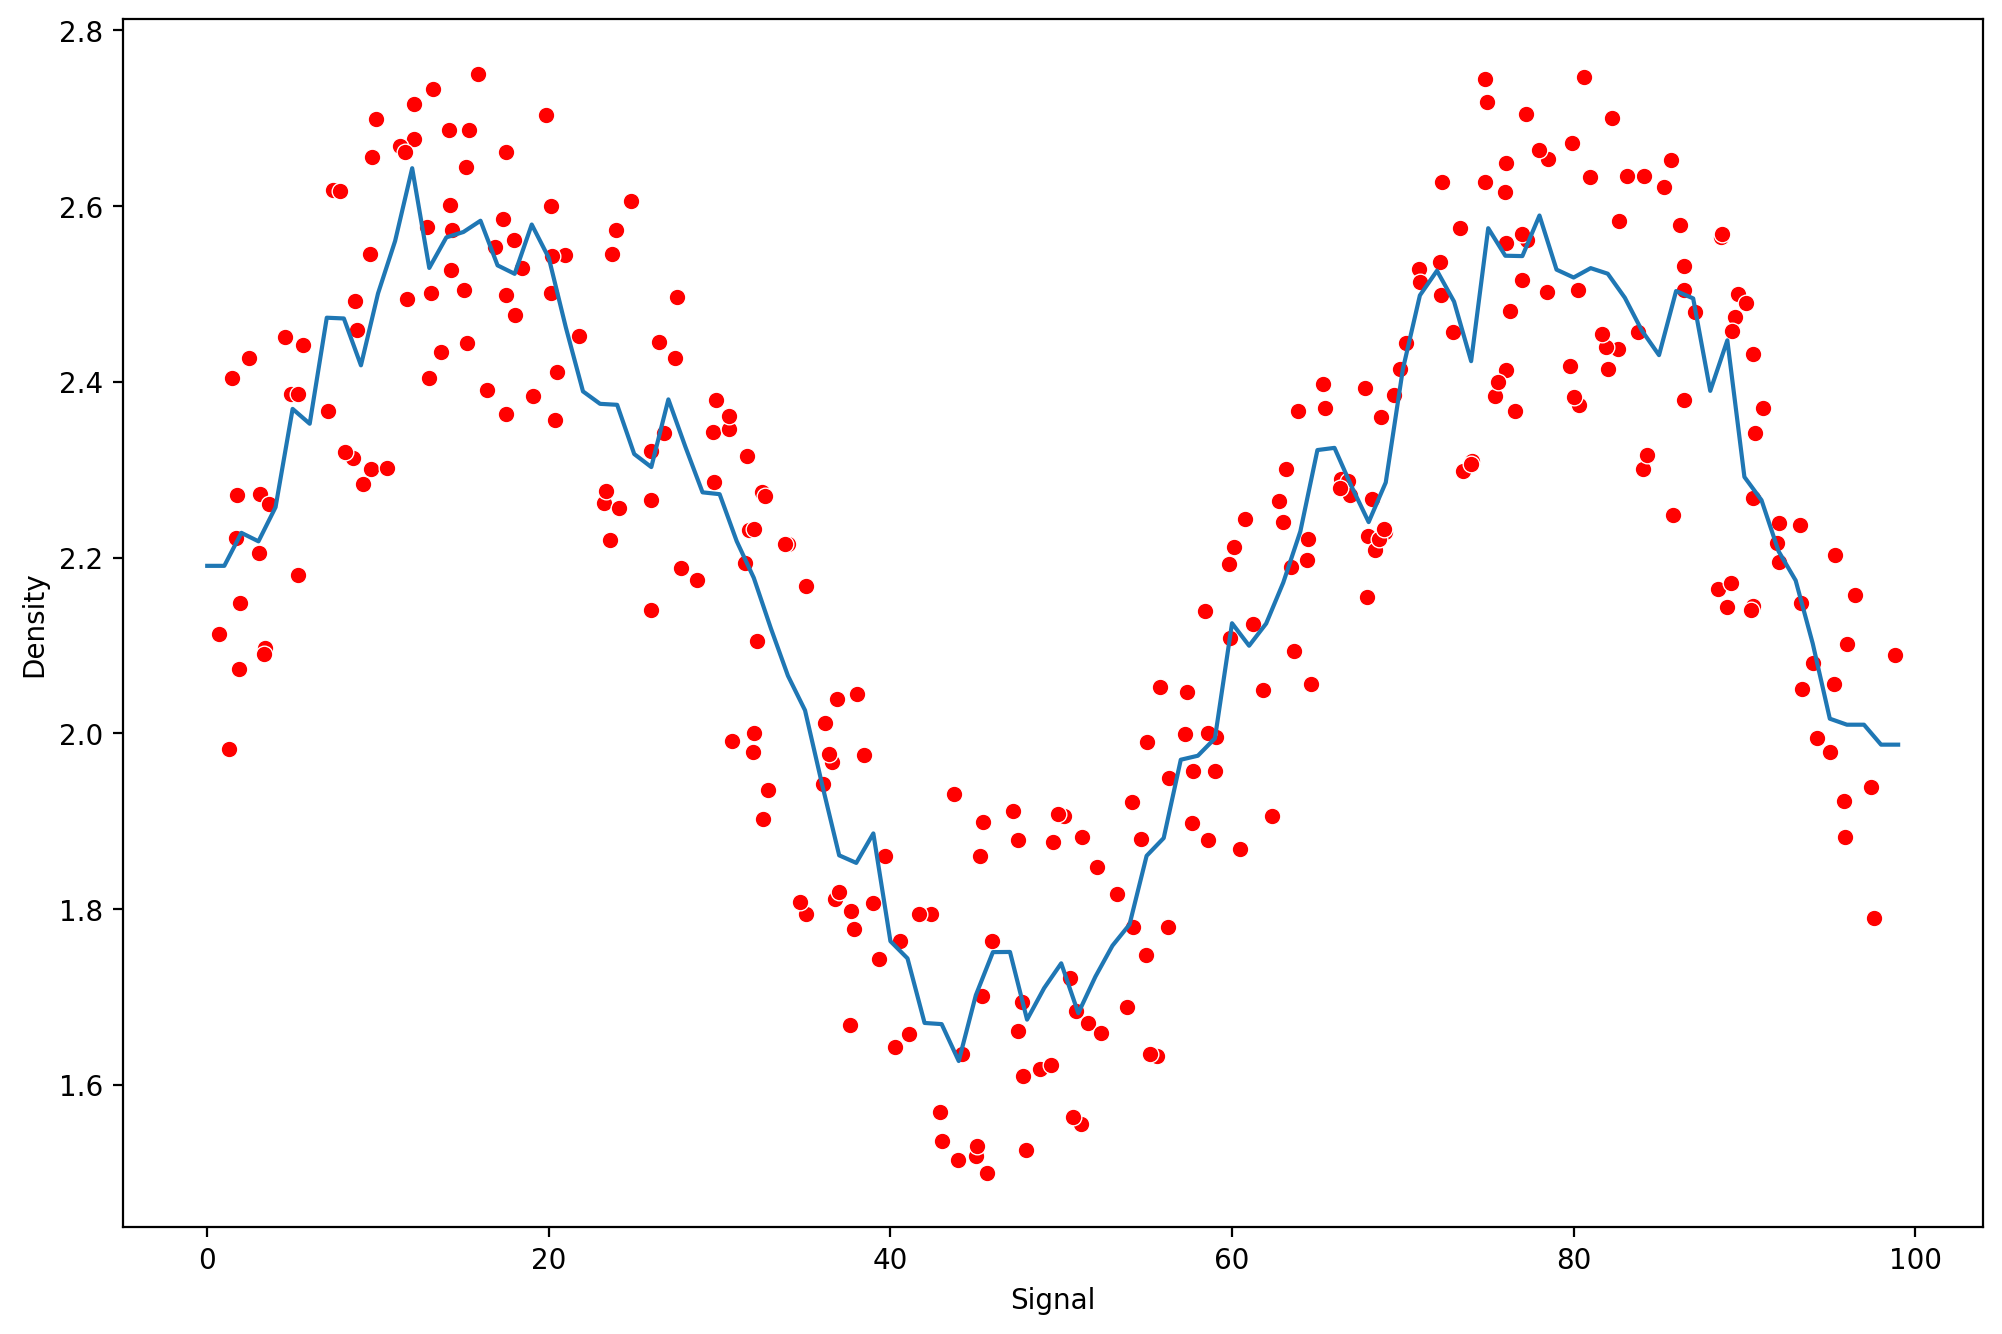

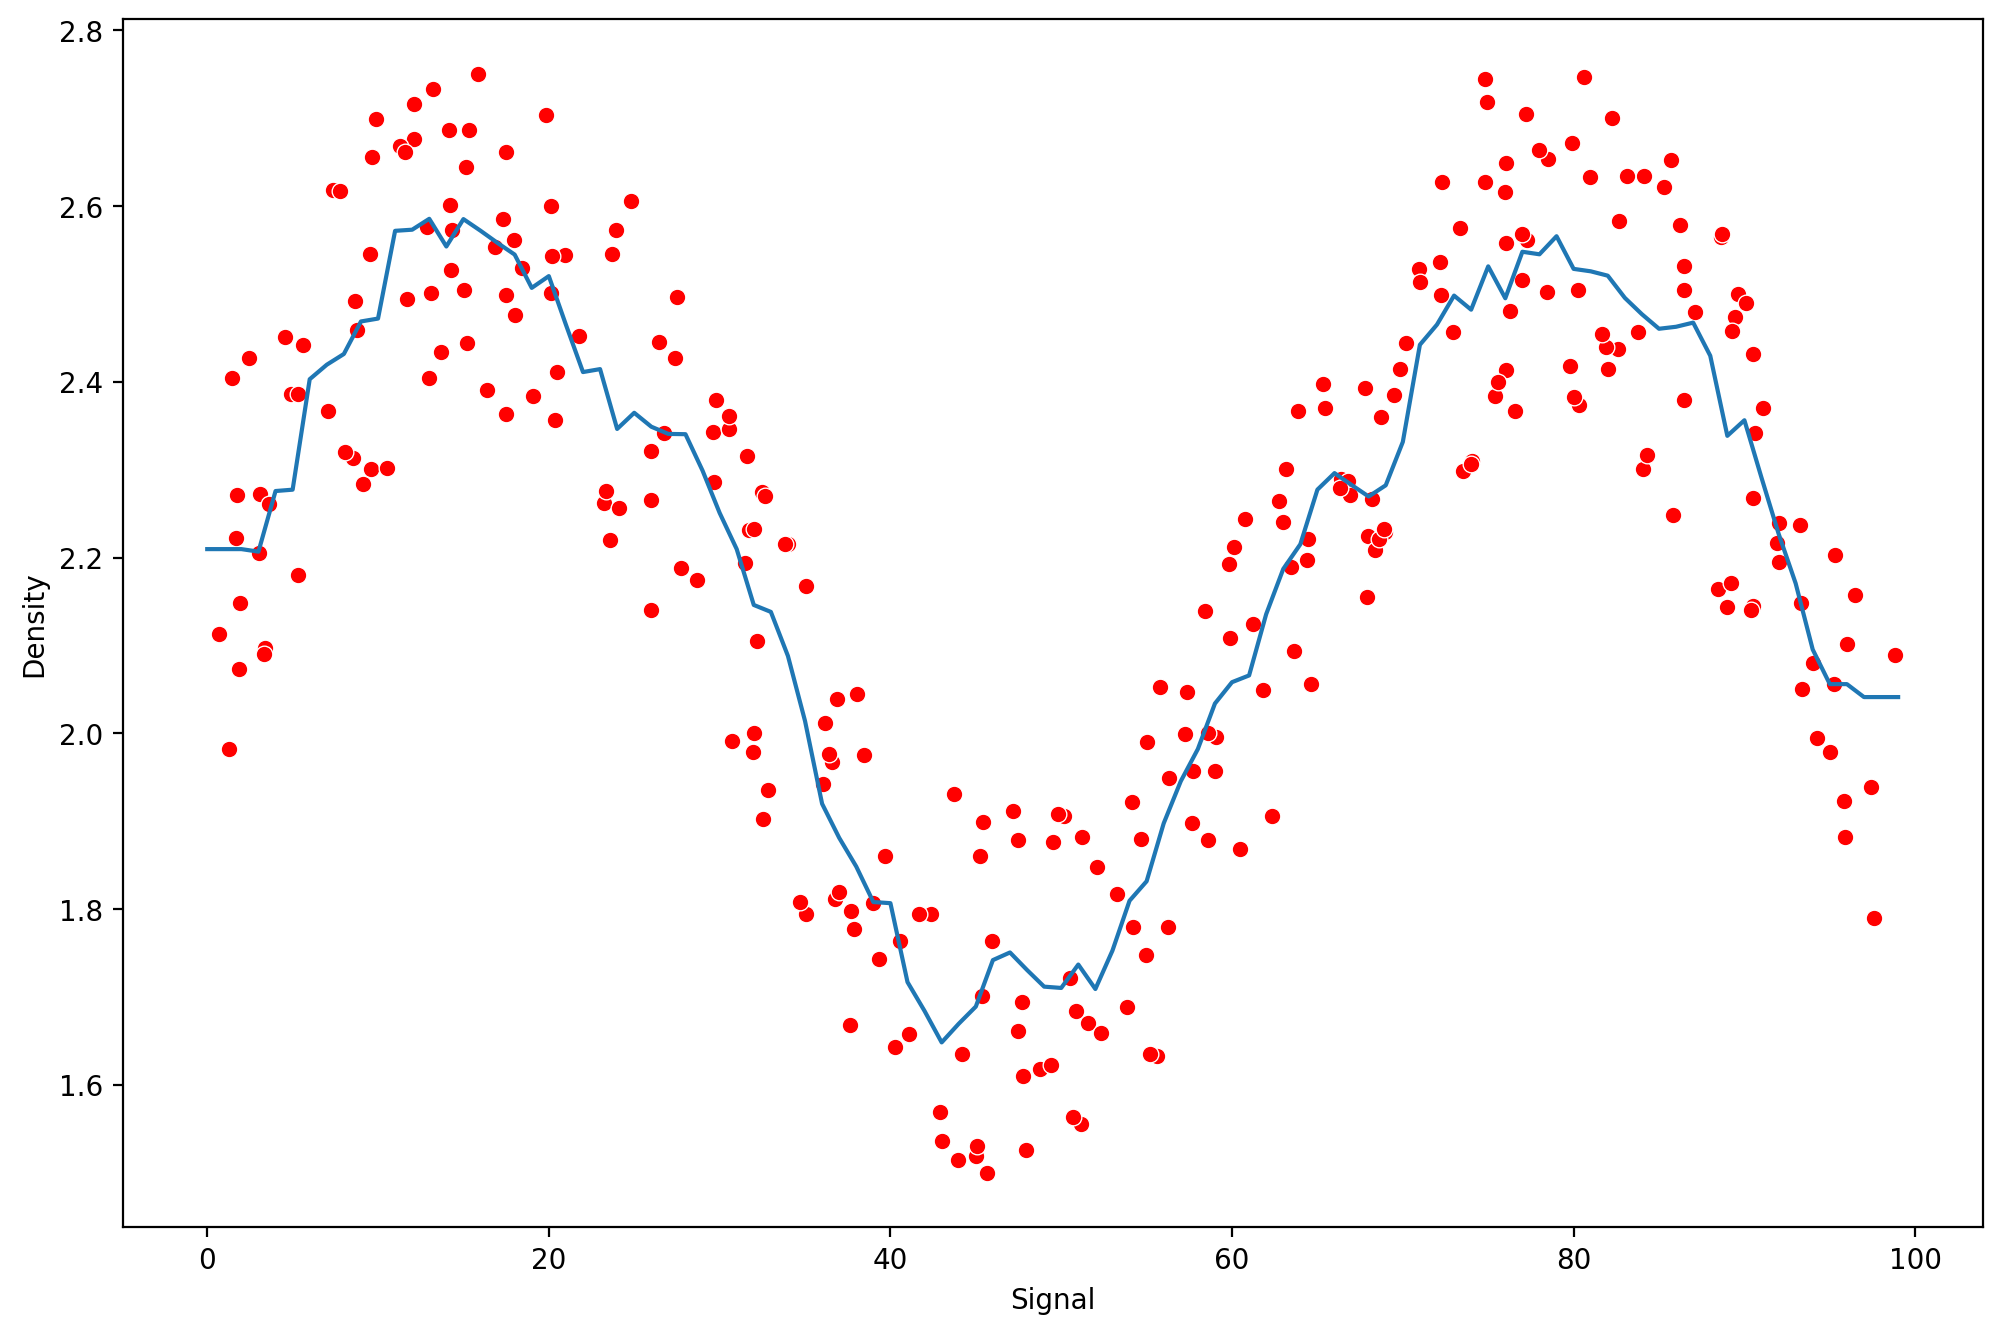

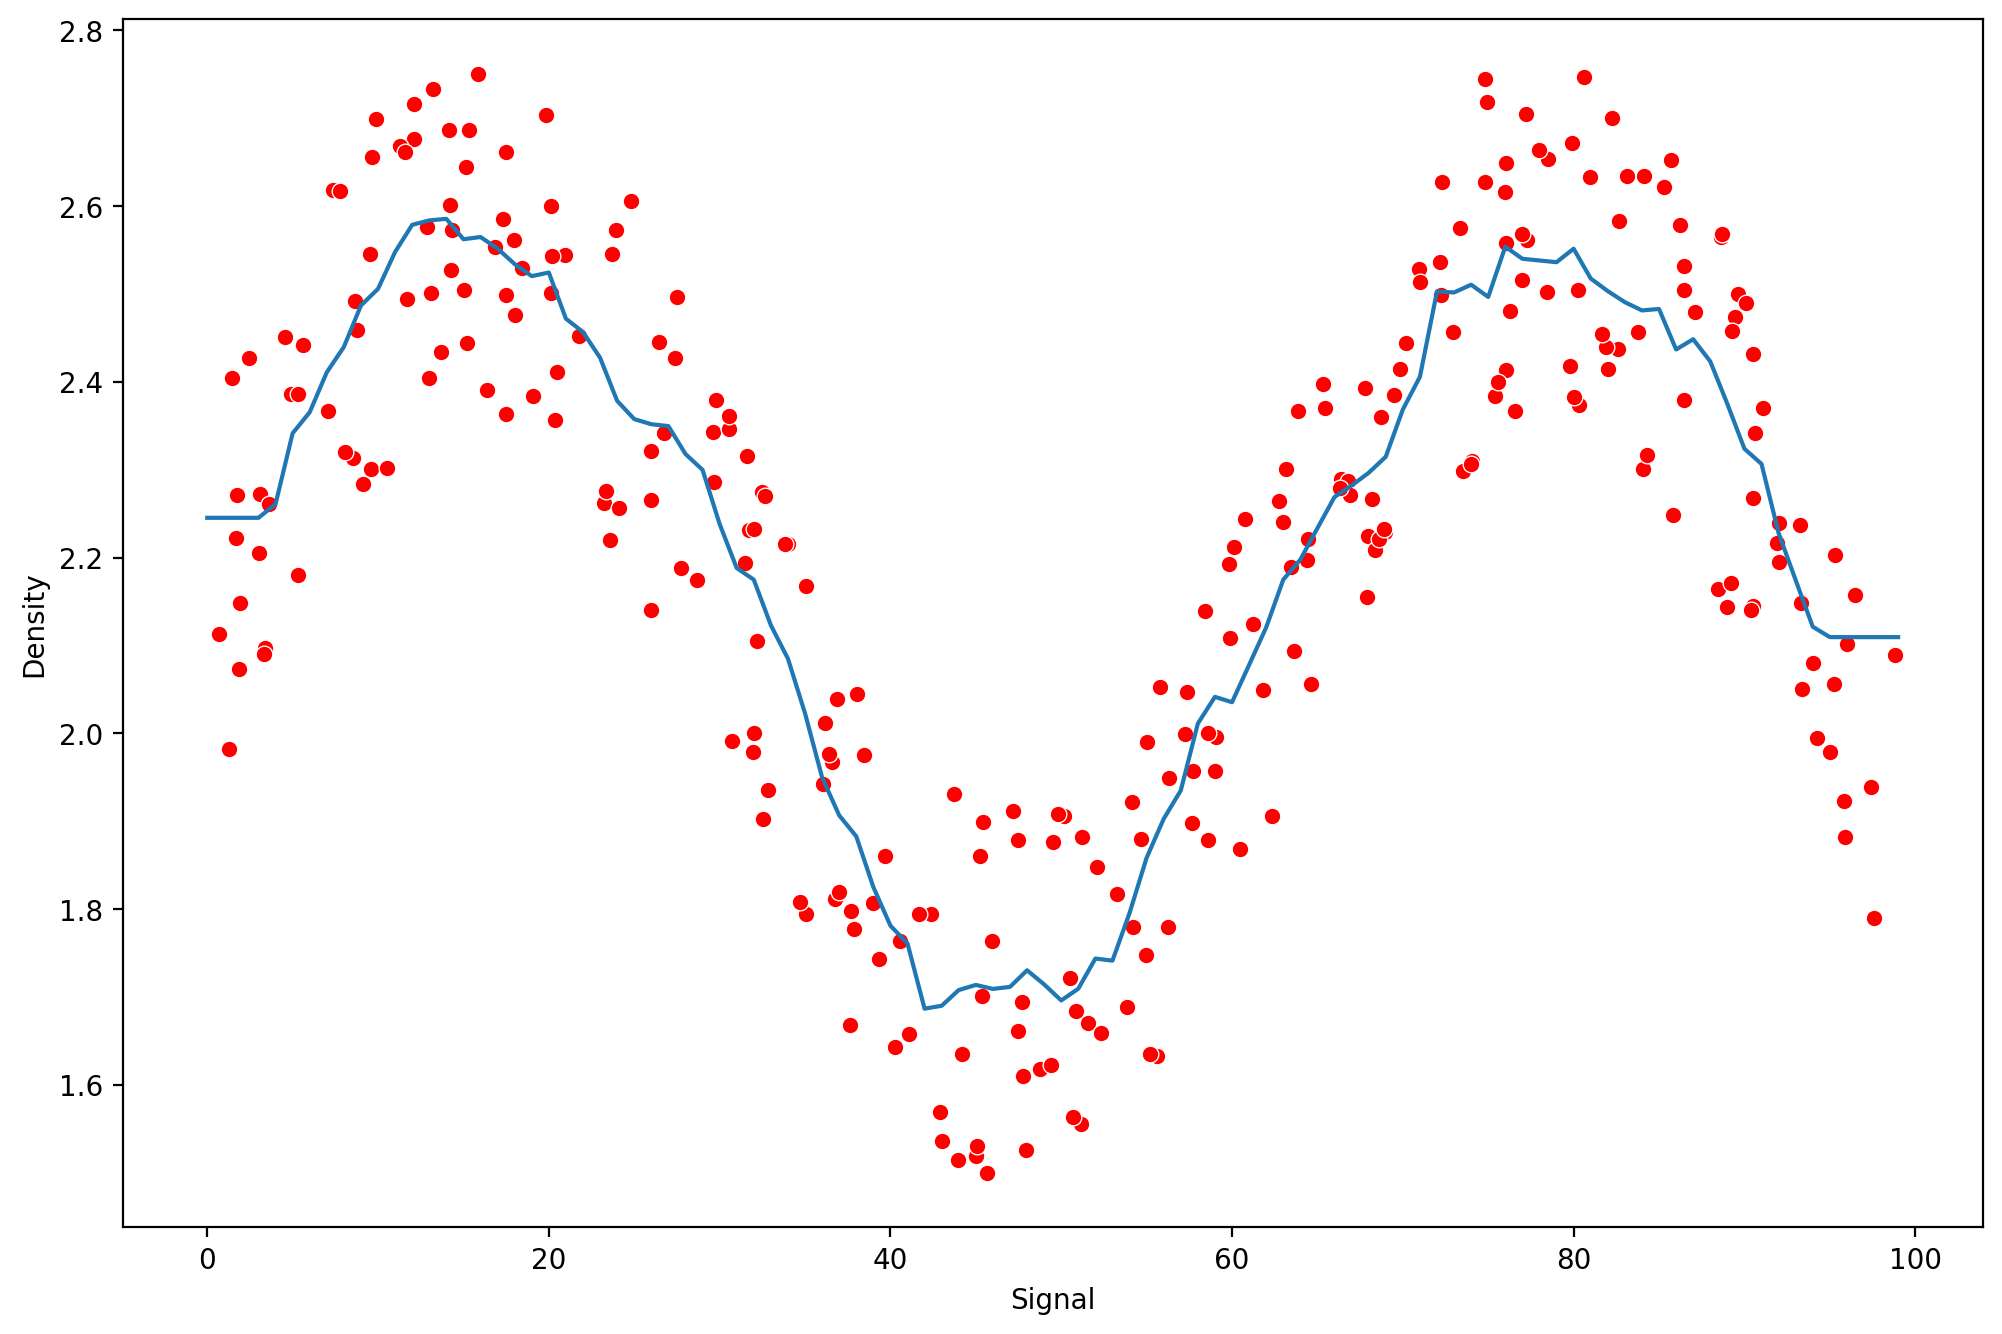

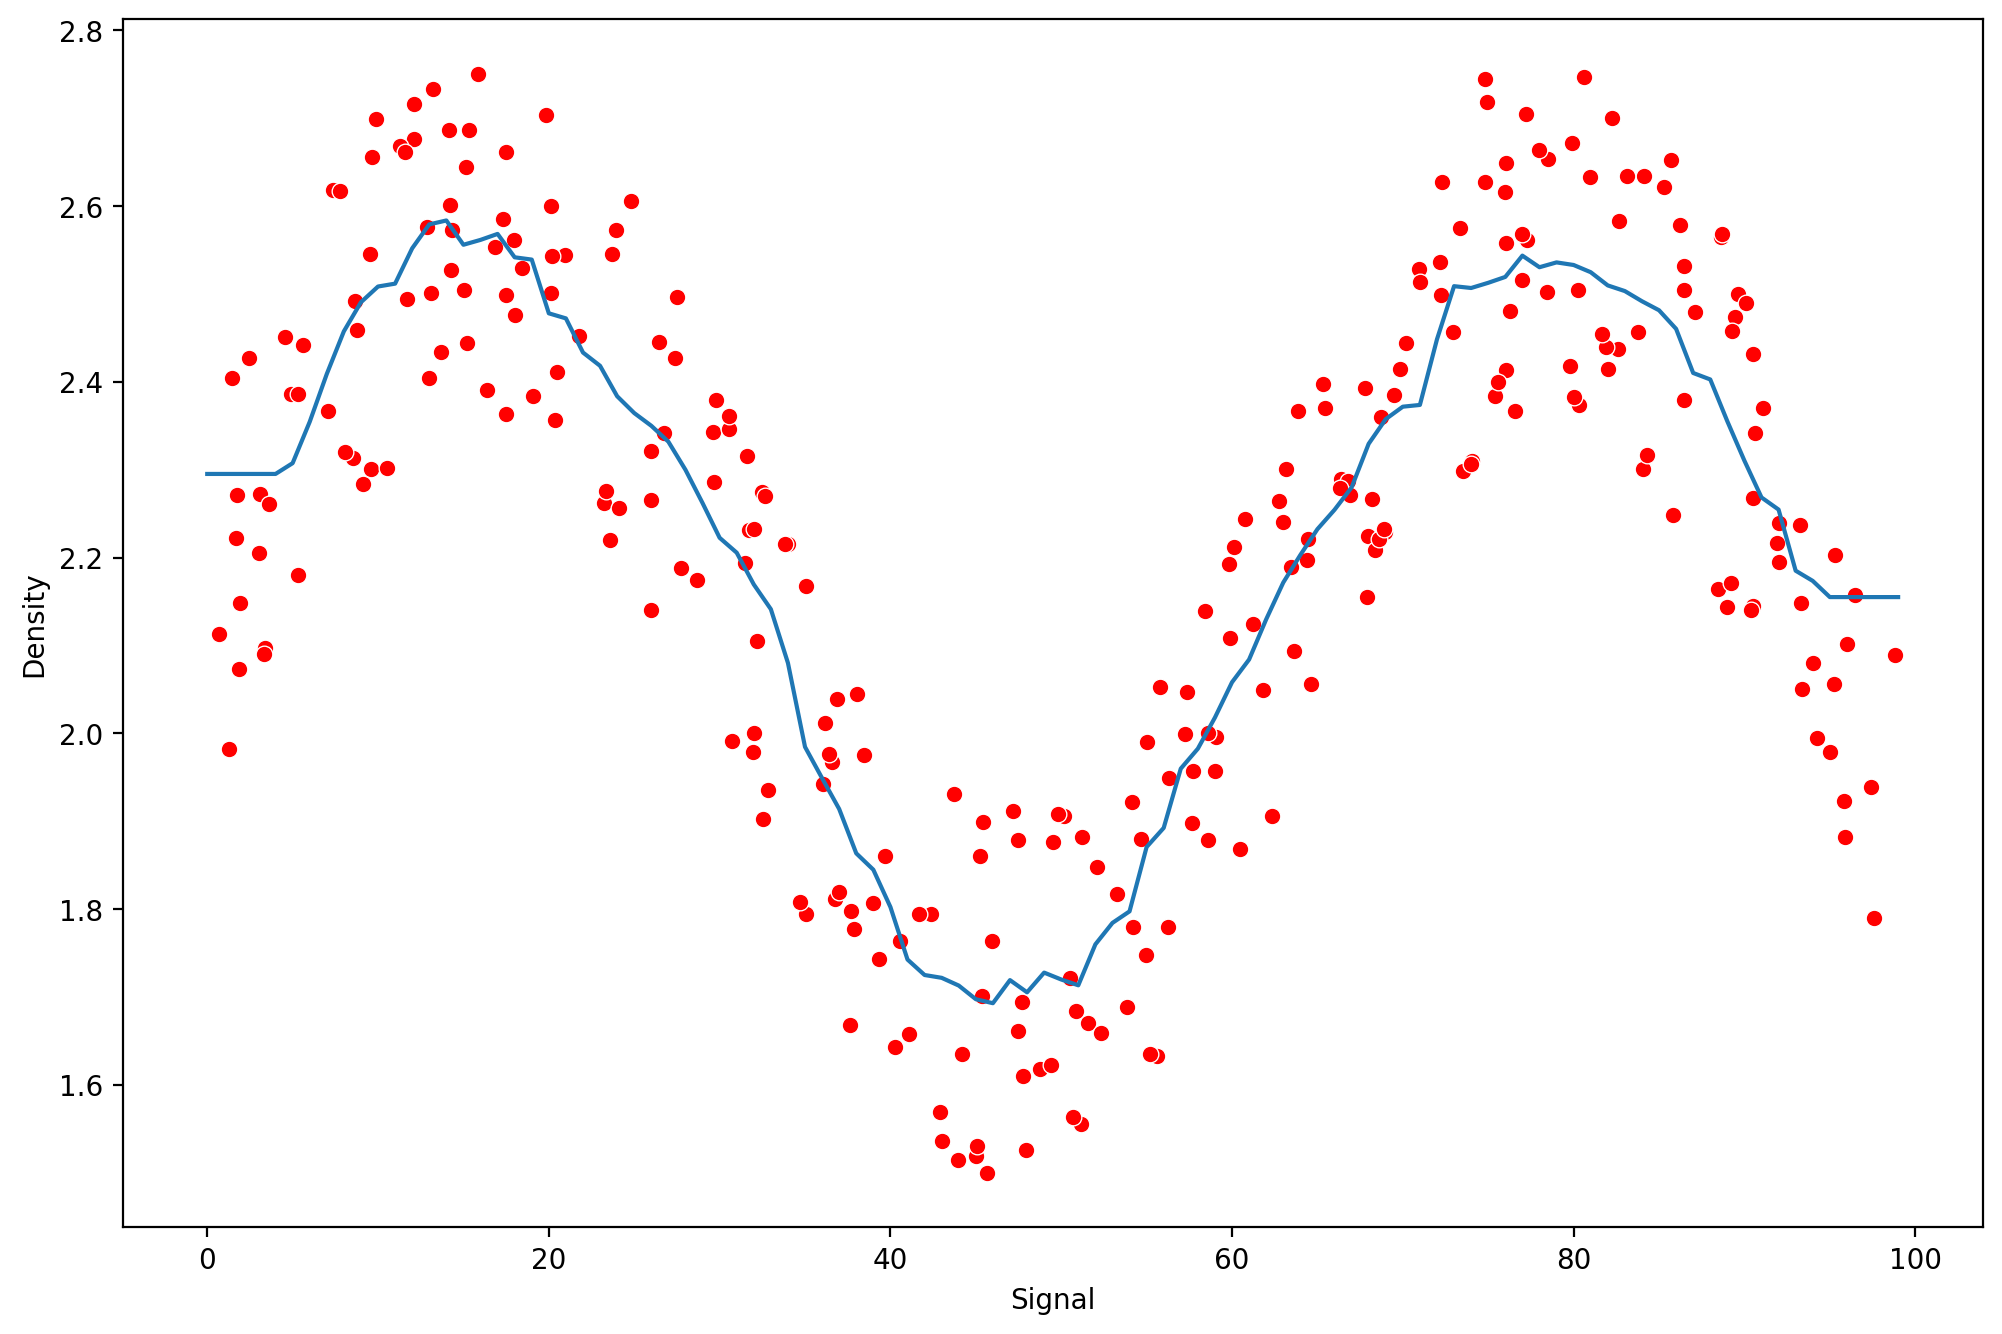

In [55]:
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    run_model(model,X_train,X_test,y_train,y_test)

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
model = DecisionTreeRegressor()

RMSE:0.16707571608725927
MAE:0.1206619084399996


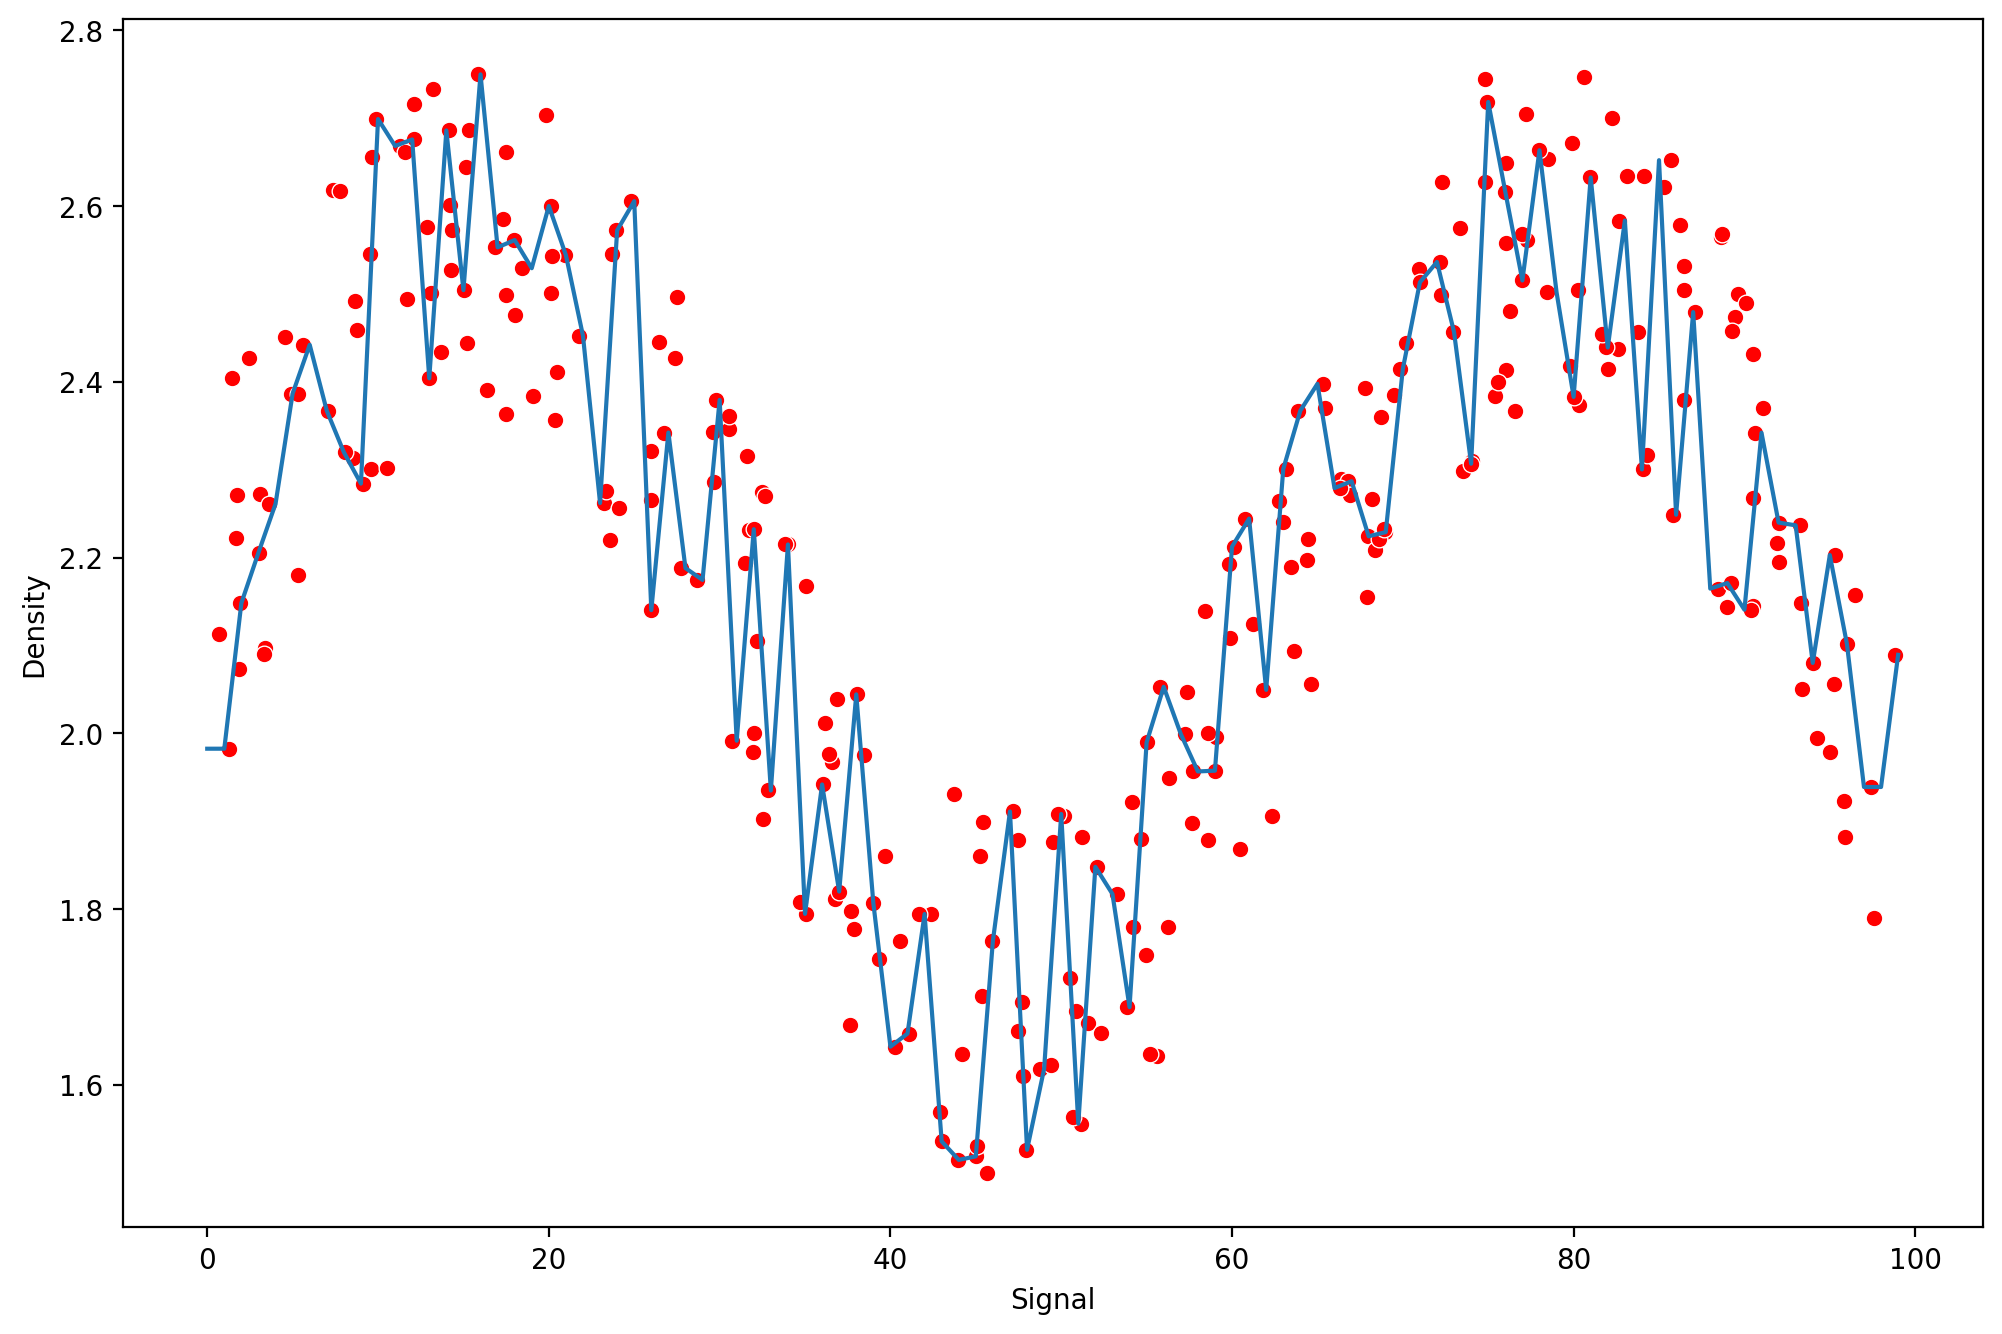

In [58]:
run_model(model,X_train,X_test,y_train,y_test)

In [59]:
from sklearn.svm import SVR

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svr = SVR()

In [62]:
param_grid = {'C':[0.01,0.1,1,10,100,1000],
             'gamma':['auto','scale']}

In [63]:
grid = GridSearchCV(svr,param_grid)

RMSE:0.141542431349303
MAE:0.12672177161621226


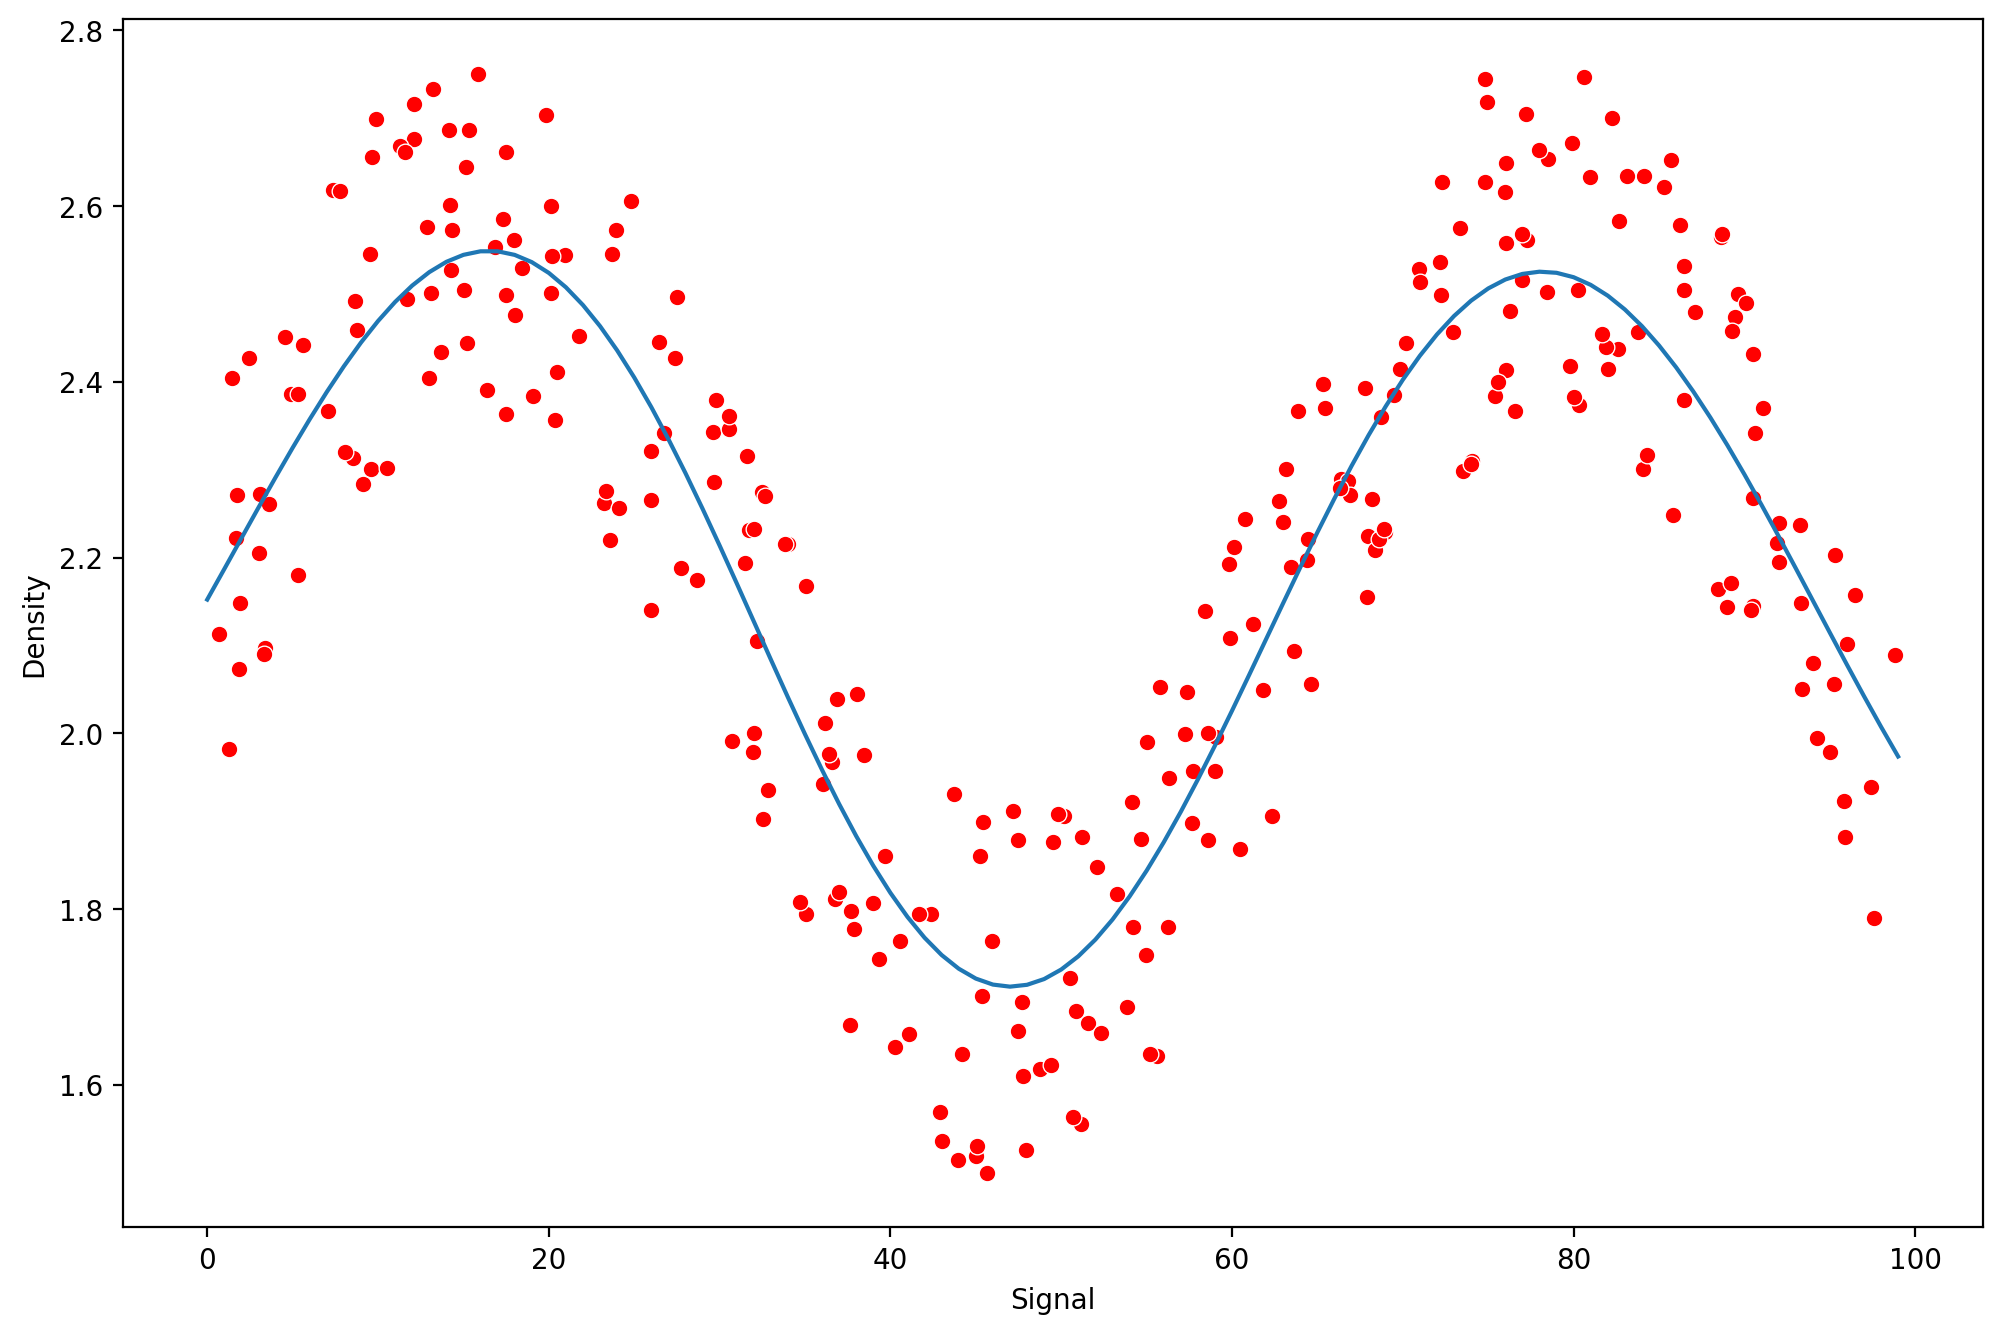

In [64]:
run_model(grid,X_train,X_test,y_train,y_test)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfc = RandomForestRegressor(n_estimators=10)

RMSE:0.1487286543444077
MAE:0.11949867458239725


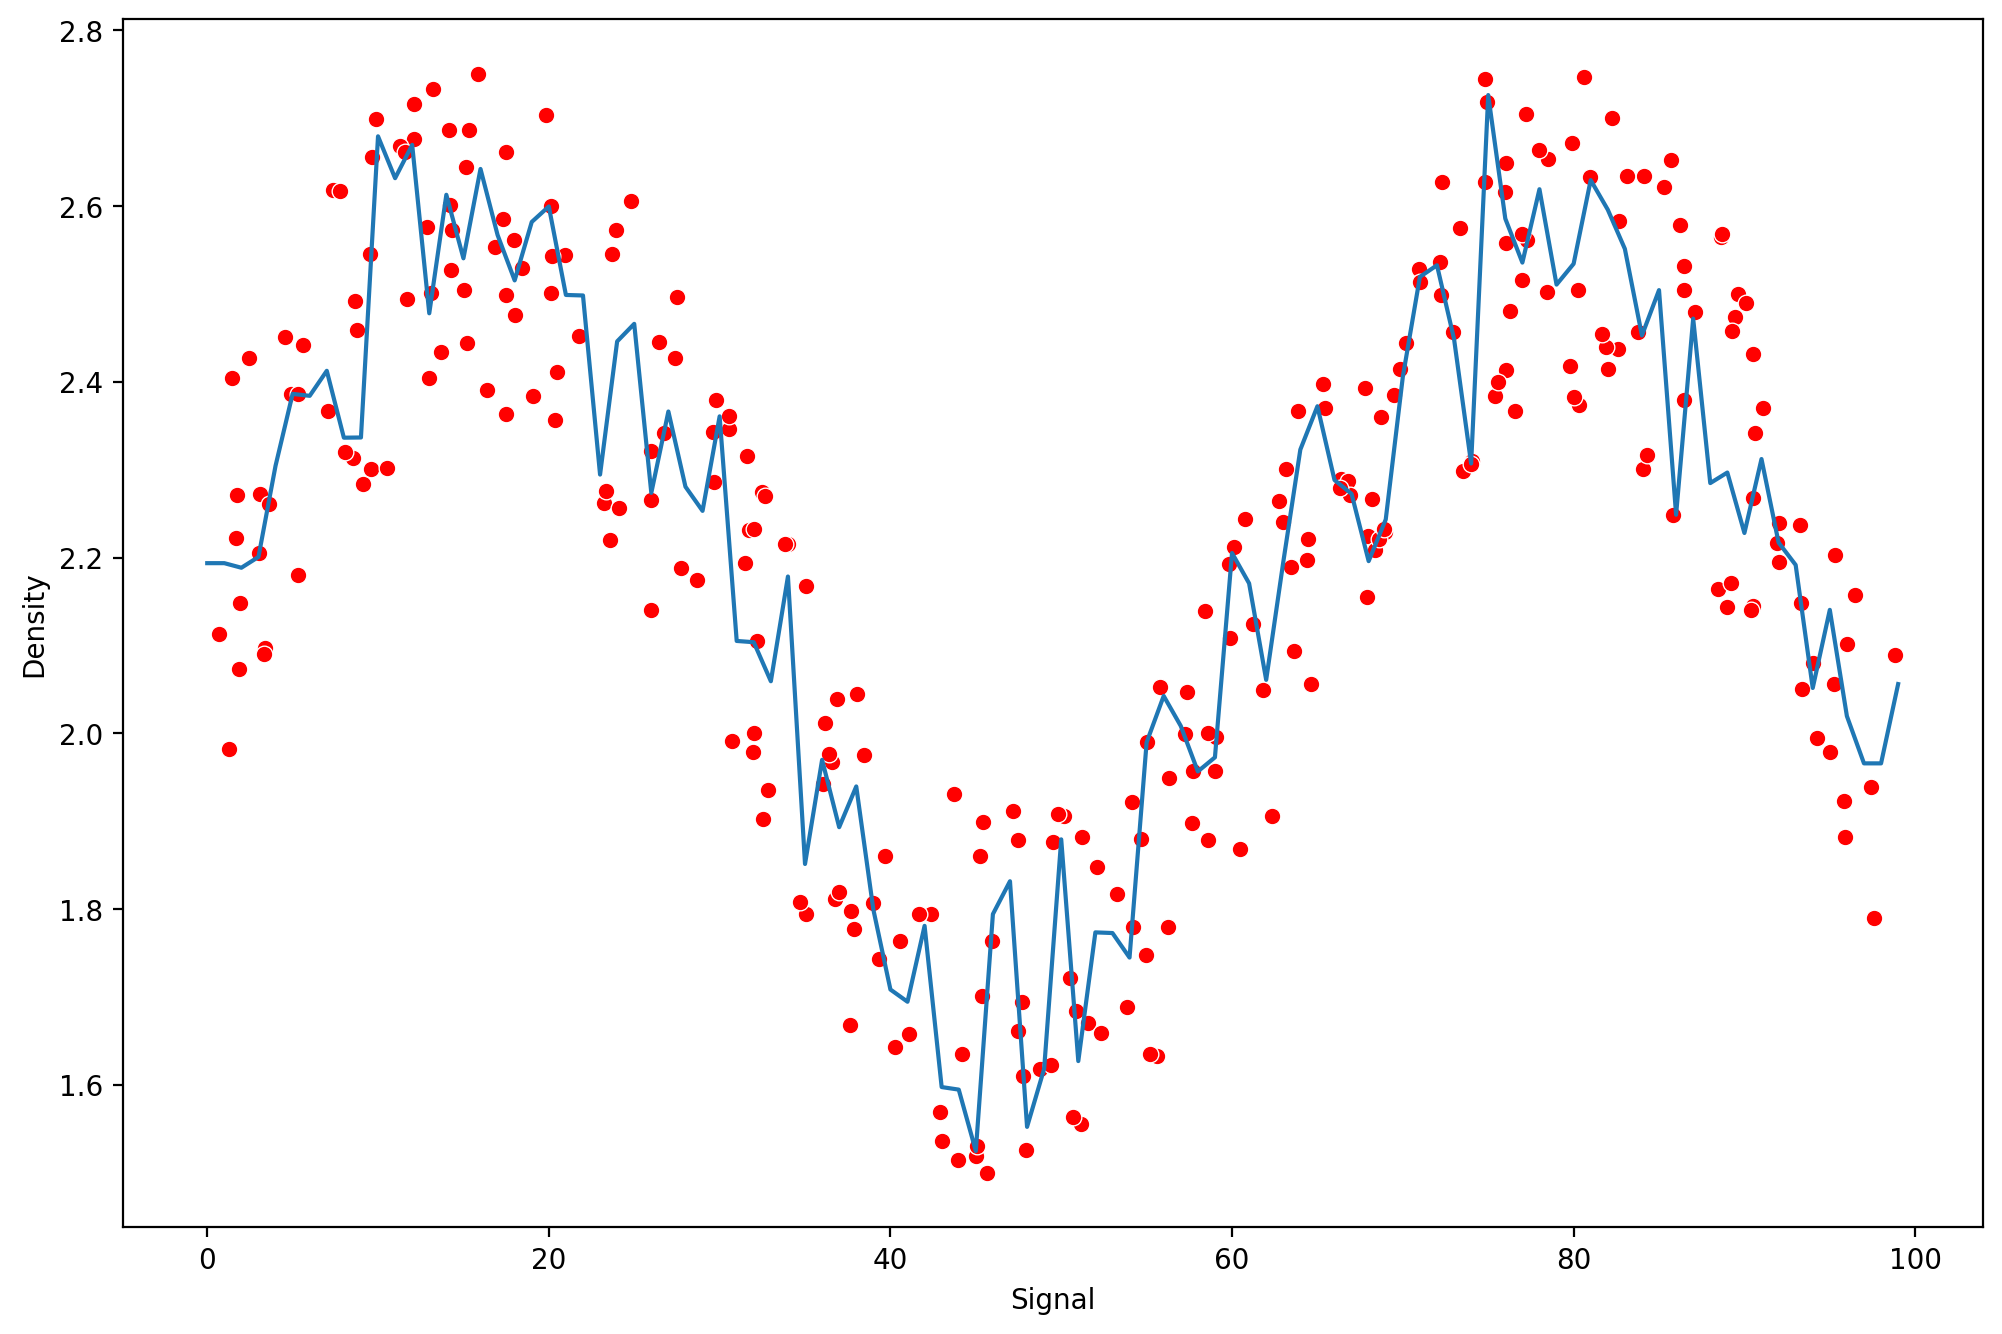

In [67]:
run_model(rfc,X_train,X_test,y_train,y_test)